#Import Library

In [184]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
import time

from PIL import Image
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

#Upload Foto dari *GitHub*

In [185]:
#Ambil dataset foto, directory filenya nanti bisa diliat di files yang kiri (/content/dataset/)
dataset_url = "https://github.com/AFSiraj/RAD_CNN/blob/main/foto_kelas.tar?raw=true"
unpack = tf.keras.utils.get_file('Foto kelas', origin=dataset_url, untar=True, cache_dir = '/content/')
data_diri = pathlib.Path('/content/datasets/foto_kelas/Foto kelas')

###cek jumlah foto

In [186]:
#cek jumlah foto
image_count = len(list(data_diri.glob('*/*.jpg')))
print(image_count)

390


#Preprocessing | buat dataset

In [187]:
batch_size = 10
img_height = 100
img_width = 100

In [188]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_diri,
  validation_split=0.3,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  labels='inferred',
  shuffle='false' ,
  color_mode='grayscale',
  )

Found 390 files belonging to 39 classes.
Using 273 files for training.


In [189]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_diri,
  validation_split=0.3,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  labels='inferred',
  shuffle='false',
  color_mode='grayscale'
  )

Found 390 files belonging to 39 classes.
Using 117 files for validation.


In [190]:
class_names = train_ds.class_names
print(class_names)

['ada', 'aff', 'afs', 'agm', 'agp', 'alf', 'ano', 'ard', 'arm', 'bsp', 'dko', 'dyn', 'fah', 'fpp', 'gas', 'gbm', 'gcc', 'gdj', 'gsa', 'him', 'hmr', 'htg', 'hwe', 'ikf', 'imr', 'jos', 'map', 'mfd', 'mfm', 'mfr', 'mhz', 'mia', 'mka', 'mkp', 'mrh', 'nfa', 'rag', 'sfv', 'sia']


In [191]:
# plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1):
#   for i in range(10):
#     ax = plt.subplot(5, 5, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.title(class_names[labels[i]])
#     plt.axis("off")

In [192]:
# plt.figure(figsize=(10, 10))
# for images, labels in val_ds.take(1):
#   for i in range(10):
#     ax = plt.subplot(5, 5, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.title(class_names[labels[i]])
#     plt.axis("off")

# Create the model

In [193]:
num_classes = 39

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
  layers.Conv2D(16, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(input_shape=(100,100)),
  layers.Dense(64, activation='tanh'),
  layers.Dense(num_classes, activation='tanh')
])

Compile the model

In [194]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [195]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_24 (Rescaling)     (None, 100, 100, 1)       0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 100, 100, 16)      160       
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 12, 12, 64)      

Train

In [196]:
start = time.time()

epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

end = time.time()

print("\nProgram runs for " + str(end - start) + " Seconds")

Epoch 1/10
28/28 [==============================] - 4s 123ms/step - loss: 3.6494 - accuracy: 0.0646 - val_loss: 3.3015 - val_accuracy: 0.2137
Epoch 2/10
28/28 [==============================] - 3s 115ms/step - loss: 2.9300 - accuracy: 0.5220 - val_loss: 2.5458 - val_accuracy: 0.7607
Epoch 3/10
28/28 [==============================] - 3s 114ms/step - loss: 2.3793 - accuracy: 0.8810 - val_loss: 2.3173 - val_accuracy: 0.8803
Epoch 4/10
28/28 [==============================] - 3s 114ms/step - loss: 2.1658 - accuracy: 0.9557 - val_loss: 2.2150 - val_accuracy: 0.8803
Epoch 5/10
28/28 [==============================] - 3s 114ms/step - loss: 2.0312 - accuracy: 0.9984 - val_loss: 2.1645 - val_accuracy: 0.8974
Epoch 6/10
28/28 [==============================] - 3s 113ms/step - loss: 1.9662 - accuracy: 1.0000 - val_loss: 2.0961 - val_accuracy: 0.9060
Epoch 7/10
28/28 [==============================] - 3s 115ms/step - loss: 1.9364 - accuracy: 0.9905 - val_loss: 2.1143 - val_accuracy: 0.9145
Epoch 

Visualize training results

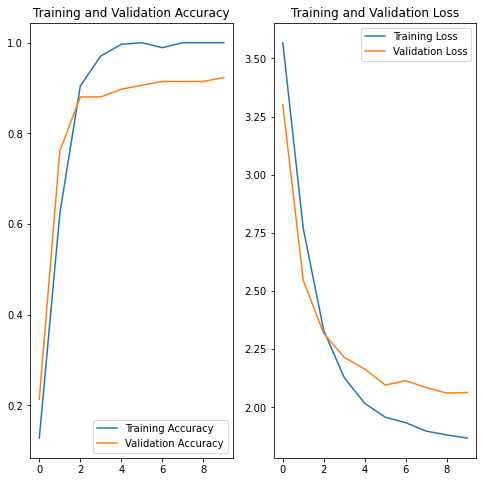

In [197]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

predict time: 0.12133121490478516s
Gambar ini termasuk class [mkp]


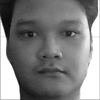

In [198]:
test_url = "https://github.com/AFSiraj/RAD_CNN/blob/main/mkp_1.jpg?raw=true"    #Gambar input merupakan gambar dengan kelas mkp maka output seharusnya menunjukan kelas mkp
test_path = tf.keras.utils.get_file('mkp_1', origin=test_url)

img = keras.preprocessing.image.load_img(
    test_path, target_size=(img_height, img_width),
    color_mode='grayscale'
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

start = time.time()
predictions = model.predict(img_array)
end = time.time()

print("predict time: "+ str(end - start) + "s" )

score = tf.nn.softmax(predictions[0])

print(
    "Gambar ini termasuk class [{}]"
    .format(class_names[np.argmax(score)])
)

img